# Python for machine learning

## Fundamentals of machine learning

- ML is everywhere in the modern world
- Machines can do repetitive tasks quickly
- We traditionally give machines input + instructions -> output
- 1959: Arthur Samuel - can machines infer logic instead of being given instructions?
- Could we give them just input data, and output from previously finished tasks, and let them figure out the best instructions to give the same output based on the data provided? E.g., is a linear model most appropriate?
- Once a model is trained, we could just give it input data
- This is supervised learning -> applications include spam filtering, image analysis, and text prediction
- Unsupervised learning -> we just give it input data, and ask it to find patterns -> e.g., movie recommendations on Netflix
- Reinforcement learning -> positive or negative feedback, to learn the optimal path to take given the environment

### Terminology

- AI is a catch-all term -> all ML is AI, not all AI is ML
- ML encompasses unsupervised, supervised, and reinforcement learning paradigms (the three core categories of ML)
- A further term within machine learning is deep learning -> all deep learning is ML, not all DL is ML

#### Unsupervised learning
- the process of building descriptive models
- identify patterns in unlabelled data
- used to summarise and group data in new ways
- useful to uncover patterns that might be informative for business purposes
- e.g., these people have x behaviour, these have y -> offer x this, and y this

#### Supervised learning 
- training a predictive model
- learn patterns from previously labelled data, and then:
- assign label to unlabelled data, based on the historical data
- input = independent variable, output = dependent variable. Together, these make training data.
- Example: previous performance of some gamblers, with preferences, cash amount (independent variables) + profit or loss for the business (dependent variables). Train the model on this.
- Assess performance of the model -> give it only input data, hiding the outcome. What does it predict? 
- This gives the predictive accuracy, e.g. 99%. 
- A model is "learning" if it's performance at a task improves with experience
- From this we can take E - experience, T - class of task, & P - performance measure (predictive accuracy)

#### Reinforcement learning
- learning to make decisions on the basis of interactions
- Objective 1: find unknown solutions to existing problems (e.g. a chess computer)
- Objective 2: Find solutions to unpredicted problems
- Two entities in RL. Agent & environment.
- Agent interacts with env by acting (its objective is to maximise rewards to itself)
- Environment provides feedback to agent (state - describes impact of previous action, and possible next actions + reward - the numeric reward)
- Exploitation = choosing the current action that maximises the reward
- Exploration = choosing other actions that do not necessarily appear to maximise the reward (choosing action without considering reward)
- The exploitation vs exploration reward problem. The simplest agent model will always choose to maximise score, rather than explore other lower scoring avenues that may be longer term higher scoring. A balanced approach is likely more successful. 


#### Deep learning
- deep because the algorithm network has many layers
- broad term in itself, a form of ML based on the human brain/animal nervous system
- feature learning or representation learning, which can be supervised, semi-supervised, or unsupervised
- progressive extraction of higher-level features from raw input
- can use "artificial neural networks", or "neural nets", algorithms with inter-connected nodes
- edges have associated weights, and the network defines rules for data to be passed from an input layer to the output layer


# Steps to the ML process

### 1. Data collection

- unlabelled data (unsupervised)
- labelled historical data (supervised)
- data that helps the agent learn which actions yield most reward (reinforcement)

Considerations: data accuracy (i.e., is it really "ground truth data"), relevance (is it important data for the model aim?), quantity (some models need little, some need a lot), variability (do we capture the full data range?), ethics (informed consent, biases in collection leading to biases in policy, etc.)

In [1]:
"""
Pandas is a good choice of package for handling large datasets,
for ML and data science in general.
"""

import pandas as pd

# Generate pandas series from list
members_list = ["Brazil","Russia","India","China","South Africa"]
brics1 = pd.Series(members_list) # Capital import
print(type(brics1))

# Pandas data frame, 2D-data structure. Essentially many series with one index.  
members_dictionary = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
        "capital": ["Brasilia", "Moscow", "New Delhi", "Beijing", "Pretoria"],
        "gdp": [2750, 1658, 3202, 15270, 370],
        "literacy":[.944, .997, .721, .964, .943],
        "expectancy": [76.8, 72.7, 68.8, 76.4, 63.6],
        "population": [210.87, 143.96, 1367.09, 1415.05, 57.4]}

brics2 = pd.DataFrame(members_dictionary)
print(type(brics2))

"""
Normally instead of making DFs from dictionaries
we'd use the pandas import functionality (many file types supported)
E.g.
brics2 = pd.read_csv("data.csv")
brics2 = pd.read_excel("data.xlsx, sheet_name = "brics_data")
"""

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


'\nNormally instead of making DFs from dictionaries\nwe\'d use the pandas import functionality (many file types supported)\nE.g.\nbrics2 = pd.read_csv("data.csv")\nbrics2 = pd.read_excel("data.xlsx, sheet_name = "brics_data")\n'

### 2. Data exploration

- understand data: describe and visualise it
- what kind of data is it?
- duplicates, missing data, inconsistent data?

In machine learning:

- an **instance** is a row of data (also called a record or observation). Each is an independent example of the target concept represented by the dataset, e.g. a customer and their data
- each instance is described by **features** (also known as attributes or variables). These are the properties of an instance. E.g. name, height, weight, income. Can be continuous, categorical, etc. 
- the **response** (if continuous) or **class** (if categorical) is a feature that holds the *dependent variable* described by the *independent variables*
- the **dimensionality** of datasets is related to the number of features. More features = more data about each instance, more dimensionality, and more computational complexity.
- the **sparcity** and **density** describe the data completeness of a dataset. 30% missing or incomplete data = 30% sparse, or 70% dense dataset

In [2]:
"""
Summarising  data with Pandas
Numerous methods are available for pandas dataframe exploration:
https://pandas.pydata.org/docs/reference/frame.html
"""

# Pandas info method
brics2.info()

# Head method to peek
brics2.head()

# Descibe method to get data aggregations, for whole dfs or columns thereof
brics2.describe()
brics2[['literacy']].describe() # can also do brics2.literacy.describe(), comparable output?

# Further column exploration methods
brics2[['country']].value_counts()  # For a column, count occurences of each value
brics2.sort_values(by=['literacy'], ascending=False)
brics2[['expectancy']].mean()

# For more complex dataframes, we could normalise
product = pd.read_csv("data/washers.csv")
product[['BrandName']].value_counts()
product[['BrandName']].value_counts(normalize = True)

# Groupby - to determine group level summaries/aggregations
product.groupby('BrandName')[['Volume']].mean()
product.groupby('BrandName')[['Volume']].mean().sort_values(by = 'Volume')

# Multiple aggregations with the .agg method
product.groupby('BrandName')[['Volume']].agg(['mean','median','max']).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   capital     5 non-null      object 
 2   gdp         5 non-null      int64  
 3   literacy    5 non-null      float64
 4   expectancy  5 non-null      float64
 5   population  5 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 368.0+ bytes


Volume            
               mean median  max
BrandName                      
Amana      4.250000   4.25  4.3
Asko       2.525000   2.70  2.7
Beko       2.133333   2.00  2.5
Blomberg   2.300000   2.50  2.5
Bosch      2.200000   2.20  2.2

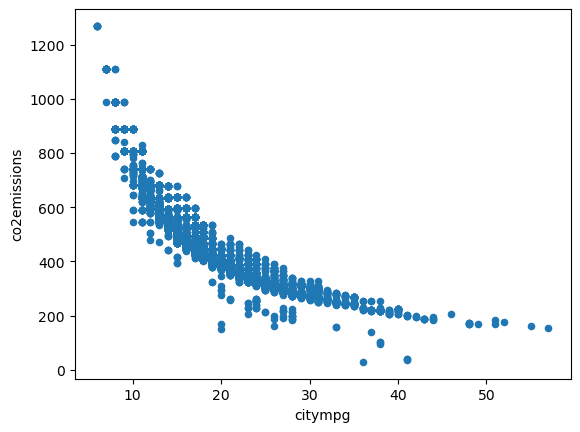

In [5]:
"""
Visualisation of data, some common methods:
Comparison of groups - boxplot
Relationships - scatter/line
Distributions - histograms
Composition - stacked bar/grouped bar

matplotlib is a popular graphics package
pandas even has methods that utilise matplotlib
e.g. dataframe.plot() # pandas df method using matplotlib
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

"""

# This is a "magic function" - sets matplotlib backend to the inline backend
# When set, plot outputs will be displayed inline within Jupyter nb. 
# Plots will also be stored in the nb.

%matplotlib inline

vehicles = pd.read_csv("data/vehicles.csv")
vehicles.head()

# Simple scatter plot, with in-built pandas plotting function
vehicles.plot(kind='scatter', x = 'citympg',y = 'co2emissions')

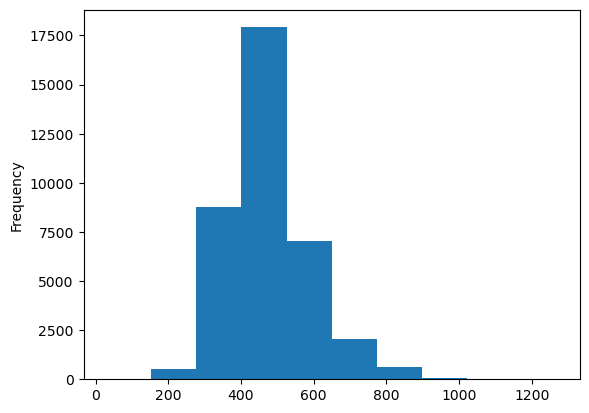

In [6]:
# Histogram of the emissions
vehicles['co2emissions'].plot(kind='hist')

/home/inkfish/programs/miniconda3/envs/python-data-science/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


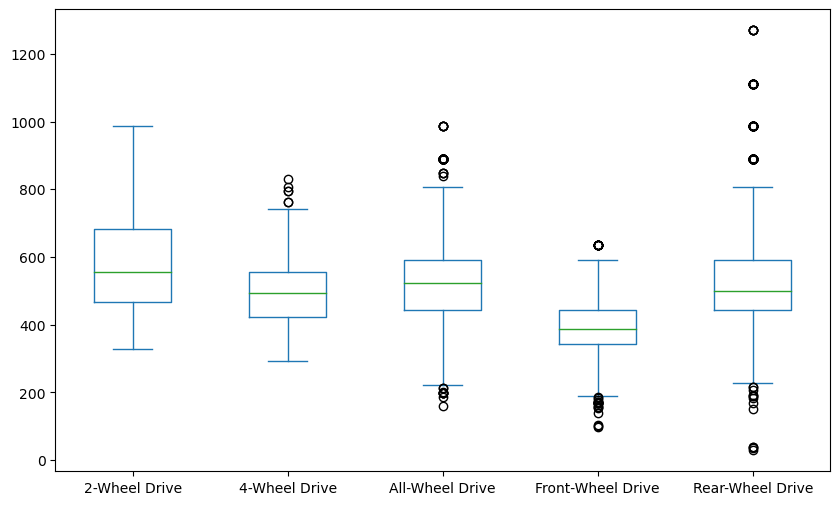

In [12]:
"""
Comparison visualisation - boxplot.
x axis values are in y columns
We need to pivot these to x for boxplots.
Pivot tables group values, aggregating individual rows
of a large dataset into fewer discrete bins/categories.
"""

# The df pivot is used for pivoting on column values
vehicles.head() # Inspect data

"""
We want a boxplot of drive types on x, co2 emissions on y
Both are in single y columns currently.
We need to pivot drive type for x (they'll be separate columns in the boxplot)
"""

# Pivot operation
vehicles.pivot(columns = 'drive', values = 'co2emissions')

# Quite some missing data (NaN - not a number)

vehicles.pivot(columns = 'drive', values = 'co2emissions').plot(kind = 'box', figsize = (10,6))


In [36]:
"""
Next block we'll be using the unstack method.
To understand it we'll look at this example.

Heirarchical index label gets pivoted to a column.
So a df is returned with a new column label, consisting of the pivoted index label.

"""

# Make the df to unstack
import numpy as np
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)

# View it before unstack
print(s)

# After unstack
print(s.unstack())

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64
       a    b
one  1.0  2.0
two  3.0  4.0


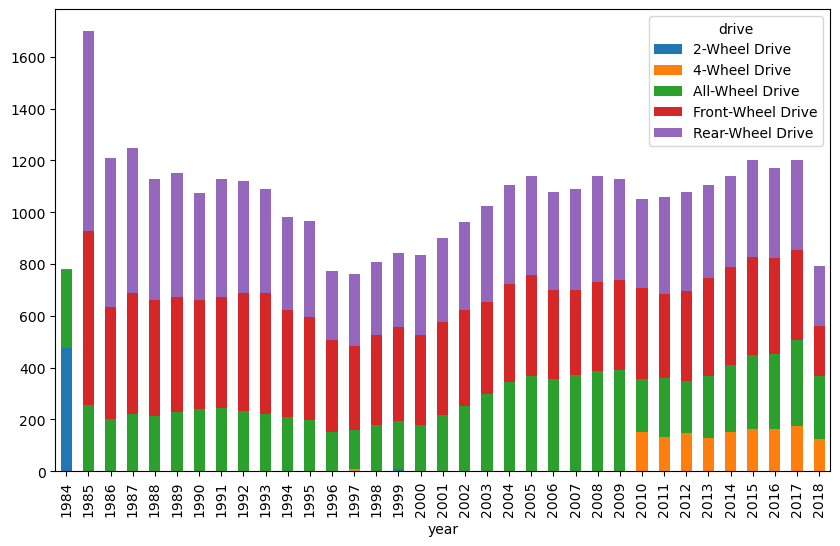

In [40]:
"""
Composition visualisation - stacked bar chart.
We need to pivot df such that x values are row labels,
and composite groups are split into the columns.

Here we want x value to be year, and columns to be drive type.
The actual values will be the counts of those types per year.
"""

# Dataframes have columns, and indexes (rows)
vehicles.columns # Returns the col headers
vehicles.index # Returns the range of the index (start=0, stop=36979, step=1)

# So we first group data by the year, on drive type value counts
vehicles.groupby('year')['drive'].value_counts()

# Then we unstack - pivot inner most index (drive) to column label
vehicles.groupby('year')['drive'].value_counts().unstack()

# Plot it
vehicles.groupby('year')['drive'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6))


one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64
       a    b
one  1.0  2.0
two  3.0  4.0


### 3. Data preparation (up to here, = 80% of the time!)

- Resolve problems (missing data, noisy data, outlier, class imbalance)
- structuring it to be easy to use (normalise, reduction etc.)

### 4. Modeling

- apply a machine learning approach to the data

### 5. Evaluation

- assess how well it worked, e.g. supervised, are labels or values correct for unseen data?
- unsupervised: a good model is one that makes sense
- iterate back to the modeling step

### 6. Actionable insight

- identify a course of action based on the model
- do we deploy the model?
- what do we do with the insights from the model?

# Artificial neural networks



# Generative artificial neural networks



- SciKit-Learn
- Pytorch
- TensorFlow
- matplotlib
- Pandas/NumPy/SciPy